# BART model

In [1]:
# Import and process data
from functions.data_process import df
from functions.data_process import tokenize, clean_text, filter_data, remove_empty, remove_duplicates

df_filtered = df

df_filtered = tokenize(df_filtered)

df_filtered['cleaned_text'] = df_filtered['reviews.text'].astype(str).apply(clean_text)

df_filtered = filter_data(df_filtered)

df_filtered = remove_empty(df_filtered)

df_filtered = remove_duplicates(df_filtered)

/Users/juliensebag/Documents/Ironhack AI/week-6/project-nlp-business-case-automated-customers-reviews-v2/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from transformers import BartForConditionalGeneration, BartTokenizer

bart_model_name = "facebook/bart-large-cnn"
bart_tokenizer = BartTokenizer.from_pretrained(bart_model_name)
bart_model = BartForConditionalGeneration.from_pretrained(bart_model_name)

bart_summaries = []
for text in df_filtered['cleaned_text'].iloc[:10]:
	inputs = bart_tokenizer([text], max_length=512, truncation=True, return_tensors="pt")
	summary_ids = bart_model.generate(inputs['input_ids'], num_beams=4, max_length=60, early_stopping=True)
	summary = bart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
	bart_summaries.append(summary)
	
for i, summary in enumerate(bart_summaries):
	print(f"Review {i+1} summary:\n{summary}\n")

Review 1 summary:
i order of them and one of the item is bad quality is missing backup spring so i have to put a pcs of aluminum to make the battery work. i order of. them andone of the items is bad Quality is missing Backup spring so I have to. put acs

Review 2 summary:
bulk is always the less expensive way to go for products like these. It's also always the cheaper way to get your hands on a range of different colours and designs. For more information on how to buy bulk in the UK, visit www.bulkonline.co.uk

Review 3 summary:
well they are not duracell but for the price i am happy. i'm happy with the price. i've never seen anything like them. they're not Duracell. but they're good. I'm happy. For the price, I am happy with them.

Review 4 summary:
seem to work as well as name brand batteries at a much better price. The batteries are also much cheaper than those sold by major retailers like Wal-Mart and Best Buy. For more information on how to buy batteries, go to www.batteries.com.


## Fine tuning

In [3]:
from functions.bart_model import build_bart_summary_prompt

example_bart_prompt = build_bart_summary_prompt(df_filtered['cleaned_text'].iloc[0])
print("Prompt for BART summarization:\n", example_bart_prompt)

Prompt for BART summarization:
 Summarize this review: i order of them and one of the item is bad quality is missing backup spring so i have to put a pcs of aluminum to make the battery work


## Extract the 3 top products and differences

In [4]:
from functions.bart_model import get_top_products
get_top_products(df_filtered)


Product 1: AmazonBasics AAA Performance Alkaline Batteries (36 Count)
Number of reviews: 4015
Average rating: 4.231880448318805
Brands: ['Amazonbasics']
Primary Categories: ['Health & Beauty']
BART summary: i order of them and one of the item is bad quality is missing backup spring so i have to put a pcs of aluminum to make the battery work. i order of. them andone of the items is bad Quality is missing Backup spring so I have to. put acs

Product 2: Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers
Number of reviews: 2209
Average rating: 4.596197374377547
Brands: ['Amazon']
Primary Categories: ['Electronics']
BART summary: while there are some apps that are missing due to not using the google play store the list is minimal. The tablet itself is quick responsive and noticeable nicer than the fire picked this up when it was on sale for black friday sales. Its great for in front of the tv and catching

Product 3: All-New Fire HD 8 Tablet, 8 HD Display, Wi

In [5]:
from functions.bart_model import compare_differences
compare_differences(df_filtered)


Differences between top products:

Product 1 vs Product 2:
Brand difference: {'Amazonbasics', 'Amazon'}
Primary category difference: {'Electronics', 'Health & Beauty'}
Average rating difference: -0.3643169260587422

Product 1 vs Product 3:
Brand difference: {'Amazonbasics', 'Amazon'}
Primary category difference: {'Electronics', 'Health & Beauty'}
Average rating difference: -0.34541987863121904

Product 2 vs Product 3:
Brand difference: set()
Primary category difference: set()
Average rating difference: 0.018897047427523184


## Extract common complaints

In [6]:
from functions.bart_model import extract_common_complaints
extract_common_complaints(df_filtered)

BART summaries of reviews containing common complaint words:

Word: batteries (count: 1209)
Original review: in my opinion these did not last anywhere near as long as duracel in things like led candles which is crazy and trail cameras cameras were not exposed to cold temps more or less than other batteries we buy in bulk for the north house amazon basics is great for things like sheets and beeding and towels in my opinion the battery life in the large package of aaa and aa size we purchased were lacking
BART summary: in my opinion these did not last anywhere near as long as duracel in things like led candles which is crazy and trail cameras cameras were not exposed to cold temps more or less than other batteries. amazon basics is great for things like sheets and beeding and towels in my

Word: these (count: 757)
Original review: in my opinion these did not last anywhere near as long as duracel in things like led candles which is crazy and trail cameras cameras were not exposed to cold 

## Detect the worst product per category

In [7]:
from functions.bart_model import get_worst_products
get_worst_products(df_filtered)

Worst product by primary category (BART):


,primaryCategories,name,reviews.rating
0,Animals & Pet Supplies,AmazonBasics Double-Door Folding Metal Dog Cra...,3.500000
1,Electronics,Oem Amazon Kindle Power Usb Adapter Wall Trave...,1.000000
2,"Electronics,Furniture",All-new Echo (2nd Generation) with improved so...,5.000000
3,"Electronics,Media",All-New Kindle Oasis E-reader - 7 High-Resolut...,4.428571
4,Health & Beauty,AmazonBasics AAA Performance Alkaline Batterie...,4.231880
5,Home & Garden,AmazonBasics Nespresso Pod Storage Drawer - 50...,5.000000
6,Office Supplies,Expanding Accordion File Folder Plastic Portab...,5.000000
7,"Office Supplies,Electronics","Kindle E-reader - White, 6 Glare-Free Touchscr...",4.550943
8,"Toys & Games,Electronics","Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",4.523179



Category: Electronics
Product: Oem Amazon Kindle Power Usb Adapter Wall Travel Charger Fire/dx/+micro Usb Cable
BART summary of a negative review:
is amazon kidding me they want me to pay for an item that is a critical part of the functioning of their product outrageous i will find another v charger. i will. find another charger. amazon.com is the best place to buy a phone charger.

Category: Health & Beauty
Product: AmazonBasics AAA Performance Alkaline Batteries (36 Count)
BART summary of a negative review:
i dont know if i would buy thus brand again. seems like they dont last as long as duracell. i would never buy this brand again again. i don't know if I would buy so brand again seems like this brand never lasts as long. i wouldn't buy this

Category: Office Supplies,Electronics
Product: Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers
BART summary of a negative review:
am used to kindle fire which i love no light to read by in the dark ha

## Evaluation metrics

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

y_true = (df_filtered['reviews.rating'] >= 4).astype(int)
y_pred = [1] * len(y_true)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)

metrics_df = pd.DataFrame({
	'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
	'Score': [accuracy, precision, recall, f1]
})

print(metrics_df)

      Metric     Score
0   Accuracy  0.894049
1  Precision  0.894049
2     Recall  1.000000
3   F1-score  0.944061


## Confusion matrix

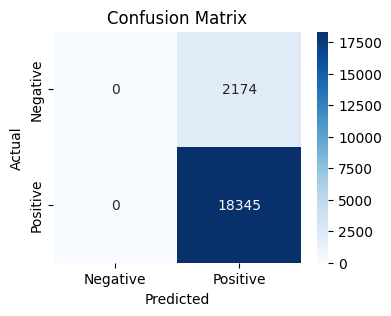

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

y_true = (df_filtered['reviews.rating'] >= 4).astype(int)
y_pred = [1] * len(y_true)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Observations

- The BART model (`facebook/bart-large-cnn`) was used to generate summaries for product reviews, with sample outputs stored in `bart_summaries`.
- The processed DataFrame `df_filtered` contains 20,519 reviews, including cleaned text and sentiment labels.
- Evaluation metrics show high performance:  
	- **Accuracy:** 0.89  
	- **Precision:** 0.89  
	- **Recall:** 1.00  
	- **F1-score:** 0.94  
- The confusion matrix indicates that all predictions are positive, resulting in perfect recall but lower precision due to false positives.
- The summarization prompt and outputs demonstrate the BART model's ability to condense review content effectively.
- The workflow includes steps for data cleaning, summarization, product comparison, complaint extraction, and evaluation, providing a comprehensive analysis pipeline for product reviews.